In [29]:
from unidecode import unidecode
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
import nltk
import string
import re
import spacy

In [30]:
datos = pd.read_csv('datos.csv', sep=';' , encoding='latin-1')
datos.head()

,MENSAJES,POLARIDAD
0,Daya Carolina ha creado el grupo GRUPO 4.,Neutro
1,Rôd?lf? Chîll ha creado el grupo Grupo6-IA2b-A...,Neutro
2,Por favor pongamos en la portada algo que teng...,Neutro
3,"Buenas tardes, que tal esta imagen. Compañero ...",Positivo
4,"A mi me gusta, esperemos haber que dicen sus c...",Positivo


In [31]:
datos['MENSAJES'] = datos['MENSAJES'].str.lower()
datos.head()

,MENSAJES,POLARIDAD
0,daya carolina ha creado el grupo grupo 4.,Neutro
1,rôd?lf? chîll ha creado el grupo grupo6-ia2b-a...,Neutro
2,por favor pongamos en la portada algo que teng...,Neutro
3,"buenas tardes, que tal esta imagen. compañero ...",Positivo
4,"a mi me gusta, esperemos haber que dicen sus c...",Positivo


In [32]:
string.punctuation += '¡'
reg_signos = re.compile('[%s]' % re.escape(string.punctuation))
datos['MENSAJES'] = datos['MENSAJES'].replace(reg_signos, '')
datos

,MENSAJES,POLARIDAD
0,daya carolina ha creado el grupo grupo 4,Neutro
1,rôdlf chîll ha creado el grupo grupo6ia2baa2016,Neutro
2,por favor pongamos en la portada algo que teng...,Neutro
3,buenas tardes que tal esta imagen compañero al...,Positivo
4,a mi me gusta esperemos haber que dicen sus co...,Positivo
...,...,...
2075,entorno personal de aprendizaje ple\nconjunto ...,Positivo
2076,ese es el concepto que queda como definicion d...,Positivo
2077,listo compañero,Positivo
2078,listo compañero,Positivo


In [33]:
datos['MENSAJES'] = datos['MENSAJES'].apply(unidecode)
datos.head(10)

,MENSAJES,POLARIDAD
0,daya carolina ha creado el grupo grupo 4,Neutro
1,rodlf chill ha creado el grupo grupo6ia2baa2016,Neutro
2,por favor pongamos en la portada algo que teng...,Neutro
3,buenas tardes que tal esta imagen companero al...,Positivo
4,a mi me gusta esperemos haber que dicen sus co...,Positivo
5,buenos dias a todos comparto una posible soluc...,Positivo
6,rodolfo muy buenos dias gracias por compartirn...,Positivo
7,ivanova procel ha creado el grupo grupo 1 2bia,Positivo
8,que es un ple,Neutro
9,ivanova procel ha subido un archivo,Positivo


In [34]:
nltk.download('perluniprops')

[nltk_data] Downloading package perluniprops to /home/ivo/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


True

In [35]:
nltk.download('nonbreaking_prefixes')

[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/ivo/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


True

In [36]:
nlp = spacy.load('es_core_news_sm')

In [37]:
datos['LEMAS'] = datos['MENSAJES'].apply(nlp)
datos

,MENSAJES,POLARIDAD,LEMAS
0,daya carolina ha creado el grupo grupo 4,Neutro,"(daya, carolina, ha, creado, el, grupo, grupo, 4)"
1,rodlf chill ha creado el grupo grupo6ia2baa2016,Neutro,"(rodlf, chill, ha, creado, el, grupo, grupo6ia..."
2,por favor pongamos en la portada algo que teng...,Neutro,"(por, favor, pongamos, en, la, portada, algo, ..."
3,buenas tardes que tal esta imagen companero al...,Positivo,"(buenas, tardes, que, tal, esta, imagen, compa..."
4,a mi me gusta esperemos haber que dicen sus co...,Positivo,"(a, mi, me, gusta, esperemos, haber, que, dice..."
...,...,...,...
2075,entorno personal de aprendizaje ple\nconjunto ...,Positivo,"(entorno, personal, de, aprendizaje, ple, \n, ..."
2076,ese es el concepto que queda como definicion d...,Positivo,"(ese, es, el, concepto, que, queda, como, defi..."
2077,listo companero,Positivo,"(listo, companero)"
2078,listo companero,Positivo,"(listo, companero)"


In [38]:
toktok = ToktokTokenizer()
tokenizer = nltk.RegexpTokenizer(r'\w+')
datos['TOKENIZE'] = datos['LEMAS'].apply(toktok.tokenize)
datos

,MENSAJES,POLARIDAD,LEMAS,TOKENIZE
0,daya carolina ha creado el grupo grupo 4,Neutro,"(daya, carolina, ha, creado, el, grupo, grupo, 4)","[daya, carolina, ha, creado, el, grupo, grupo, 4]"
1,rodlf chill ha creado el grupo grupo6ia2baa2016,Neutro,"(rodlf, chill, ha, creado, el, grupo, grupo6ia...","[rodlf, chill, ha, creado, el, grupo, grupo6ia..."
2,por favor pongamos en la portada algo que teng...,Neutro,"(por, favor, pongamos, en, la, portada, algo, ...","[por, favor, pongamos, en, la, portada, algo, ..."
3,buenas tardes que tal esta imagen companero al...,Positivo,"(buenas, tardes, que, tal, esta, imagen, compa...","[buenas, tardes, que, tal, esta, imagen, compa..."
4,a mi me gusta esperemos haber que dicen sus co...,Positivo,"(a, mi, me, gusta, esperemos, haber, que, dice...","[a, mi, me, gusta, esperemos, haber, que, dice..."
...,...,...,...,...
2075,entorno personal de aprendizaje ple\nconjunto ...,Positivo,"(entorno, personal, de, aprendizaje, ple, \n, ...","[entorno, personal, de, aprendizaje, ple, conj..."
2076,ese es el concepto que queda como definicion d...,Positivo,"(ese, es, el, concepto, que, queda, como, defi...","[ese, es, el, concepto, que, queda, como, defi..."
2077,listo companero,Positivo,"(listo, companero)","[listo, companero]"
2078,listo companero,Positivo,"(listo, companero)","[listo, companero]"


In [39]:
stop_words = set(stopwords.words('spanish'))
datos['STOP WORDS'] = datos['TOKENIZE'].apply(lambda msg: [item for item in msg if item not in stop_words])
datos.head()

,MENSAJES,POLARIDAD,LEMAS,TOKENIZE,STOP WORDS
0,daya carolina ha creado el grupo grupo 4,Neutro,"(daya, carolina, ha, creado, el, grupo, grupo, 4)","[daya, carolina, ha, creado, el, grupo, grupo, 4]","[daya, carolina, creado, grupo, grupo, 4]"
1,rodlf chill ha creado el grupo grupo6ia2baa2016,Neutro,"(rodlf, chill, ha, creado, el, grupo, grupo6ia...","[rodlf, chill, ha, creado, el, grupo, grupo6ia...","[rodlf, chill, creado, grupo, grupo6ia2baa2016]"
2,por favor pongamos en la portada algo que teng...,Neutro,"(por, favor, pongamos, en, la, portada, algo, ...","[por, favor, pongamos, en, la, portada, algo, ...","[favor, pongamos, portada, relacion, asignatura]"
3,buenas tardes que tal esta imagen companero al...,Positivo,"(buenas, tardes, que, tal, esta, imagen, compa...","[buenas, tardes, que, tal, esta, imagen, compa...","[buenas, tardes, tal, imagen, companero, algun..."
4,a mi me gusta esperemos haber que dicen sus co...,Positivo,"(a, mi, me, gusta, esperemos, haber, que, dice...","[a, mi, me, gusta, esperemos, haber, que, dice...","[gusta, esperemos, haber, dicen, companeros, e..."


<AxesSubplot:ylabel='POLARIDAD'>

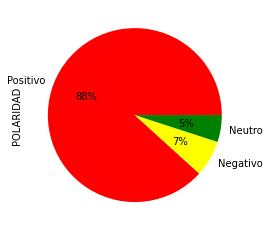

In [40]:
datos.POLARIDAD.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [41]:
features = datos['STOP WORDS'].iloc[:].values
labels = datos['POLARIDAD'].iloc[:].values

In [42]:
processed_features = [ ]
for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    processed_features.append(processed_feature)
processed_features

[' daya carolina creado grupo grupo 4 ',
 ' rodlf chill creado grupo grupo6ia2baa2016 ',
 ' favor pongamos portada relacion asignatura ',
 ' buenas tardes tal imagen companero alguna sugerencia ',
 ' gusta esperemos haber dicen companeros equipo ',
 ' buenos dias comparto posible solucion problema 513 texto basico ',
 ' rodolfo buenos dias gracias compartirnos tarea esperemos ver dicen colegas equipo ',
 ' ivanova procel creado grupo grupo 1 2bia ',
 ' ple ',
 ' ivanova procel subido archivo ',
 ' jeoffre v lima subido archivo ',
 ' companero parece interesante trabajo ',
 ' aun logro terminar trabajo listo subo companeros ',
 ' ok ',
 ' parece companeros si comunicamos noche ir haciendo grupal vez ',
 ' si parece mejor manana tarde noche todavia falta ruben suba trabajo fijar hora podamos conectarnos ',
 ' ok ',
 ' companeros buenos dias favor vamos terminando pea poder hacer grupal termina tiempo hacer trabajos tambien ',
 ' jjjj ple dusculpen ',
 ' ruben salinas subido archivo ',
 '

In [43]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('spanish'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [46]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [47]:
predictions = text_classifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[  4   0  23]
 [  0   2   9]
 [  3   2 373]]
              precision    recall  f1-score   support

    Negativo       0.57      0.15      0.24        27
      Neutro       0.50      0.18      0.27        11
    Positivo       0.92      0.99      0.95       378

    accuracy                           0.91       416
   macro avg       0.66      0.44      0.48       416
weighted avg       0.89      0.91      0.89       416

0.9110576923076923


In [49]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred = svclassifier.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  2   0  25]
 [  0   2   9]
 [  1   0 377]]
              precision    recall  f1-score   support

    Negativo       0.67      0.07      0.13        27
      Neutro       1.00      0.18      0.31        11
    Positivo       0.92      1.00      0.96       378

    accuracy                           0.92       416
   macro avg       0.86      0.42      0.47       416
weighted avg       0.90      0.92      0.89       416



In [52]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [53]:
y_pred = svclassifier.predict(X_test)

In [54]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  2   0  25]
 [  0   2   9]
 [  2   0 376]]
              precision    recall  f1-score   support

    Negativo       0.50      0.07      0.13        27
      Neutro       1.00      0.18      0.31        11
    Positivo       0.92      0.99      0.95       378

    accuracy                           0.91       416
   macro avg       0.81      0.42      0.46       416
weighted avg       0.89      0.91      0.88       416

